In [5]:

%matplotlib inline
from ggplot import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [119]:
df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Lo-Med', 'Med', 'High','Lo-Med', 'Med', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [6, 14, 50, 3, 2, 90, 25, 25, 160],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'],ordered=True)
df['category'] = pd.Categorical(df['category'], categories=['High','Med','Lo-Med','Lo'],ordered=True)
df

,category,value,variable
0,Lo-Med,6,gender
1,Med,14,gender
2,High,50,age
3,Lo-Med,3,age
4,Med,2,age
5,Lo,90,income
6,Lo-Med,25,income
7,Med,25,income
8,High,160,income


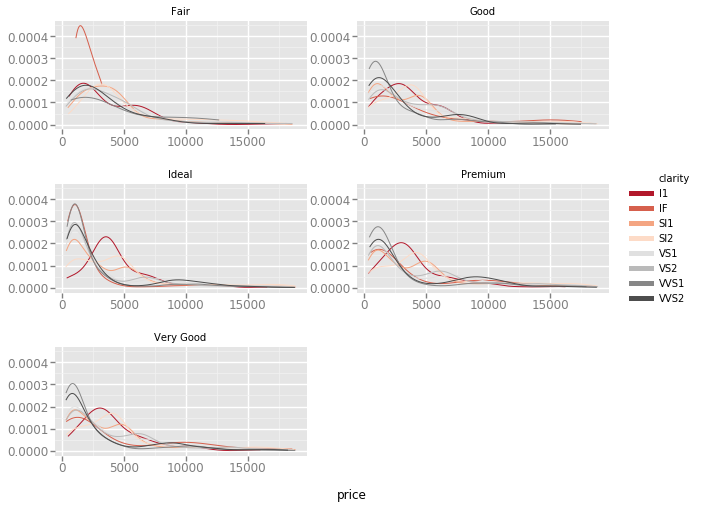

<ggplot: (14130054)>

In [10]:
ggplot(diamonds, aes(x='price', color='clarity')) + \
    geom_density() + \
    scale_color_brewer(type='div', palette=6) + \
    facet_wrap('cut')

In [58]:
df.pivot_table(index='variable',columns='category',values='value')

category,High,Med,Lo-Med,Lo
variable,,,,
gender,NaN,40.0,60.0,NaN
age,50.0,20.0,30.0,NaN
income,40.0,25.0,25.0,10.0


In [108]:
df_agg.values/df_agg.sum(axis=1).values.reshape(-1,1)

array([[0.        , 0.7       , 0.3       , 0.        ],
       [0.5       , 0.2       , 0.3       , 0.        ],
       [0.53333333, 0.08333333, 0.08333333, 0.3       ]])

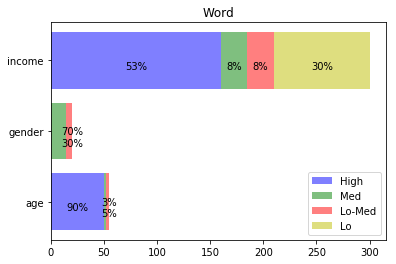

In [153]:
import matplotlib.pylab as plt
import numpy as np
fig, ax = plt.subplots()

colors = ['b','g','r','y']
bar_width = 0.35

df_agg = df.pivot_table(index='variable',columns='category',values='value').fillna(0)

percentages=df_agg.values/df_agg.sum(axis=1).values.reshape(-1,1)

left = np.zeros(df_agg.shape[0])

texts = [""]*3
for i,key in enumerate(df_agg.columns):
    if i==0:
        rects = plt.barh(df_agg.index, df_agg.iloc[:,i],  color=colors[i], label=key, alpha= 0.5)
    else:
        rects = plt.barh(df_agg.index, df_agg.iloc[:,i],  color=colors[i], label=key, alpha= 0.5, left=left)
    left += df_agg.iloc[:,i]
    
    for j,patch in enumerate(rects):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]

        if df_agg.iloc[j,i]>0:
            txt ="%d%%" % (percentages[j,i]*100)
            
            texts[j] += "\n"+ txt
            
            
        if df_agg.iloc[j,i]>20 or i==len(percentages[:,i]):
            ax.text(x,y, texts[j],ha='center',va='center')
            texts[j] =""

plt.title('Word')

plt.legend()
plt.show()